In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'KL'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

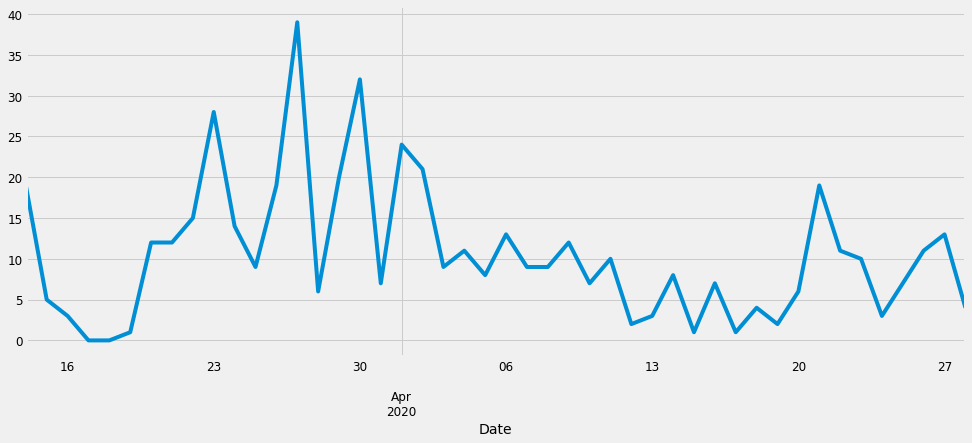

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

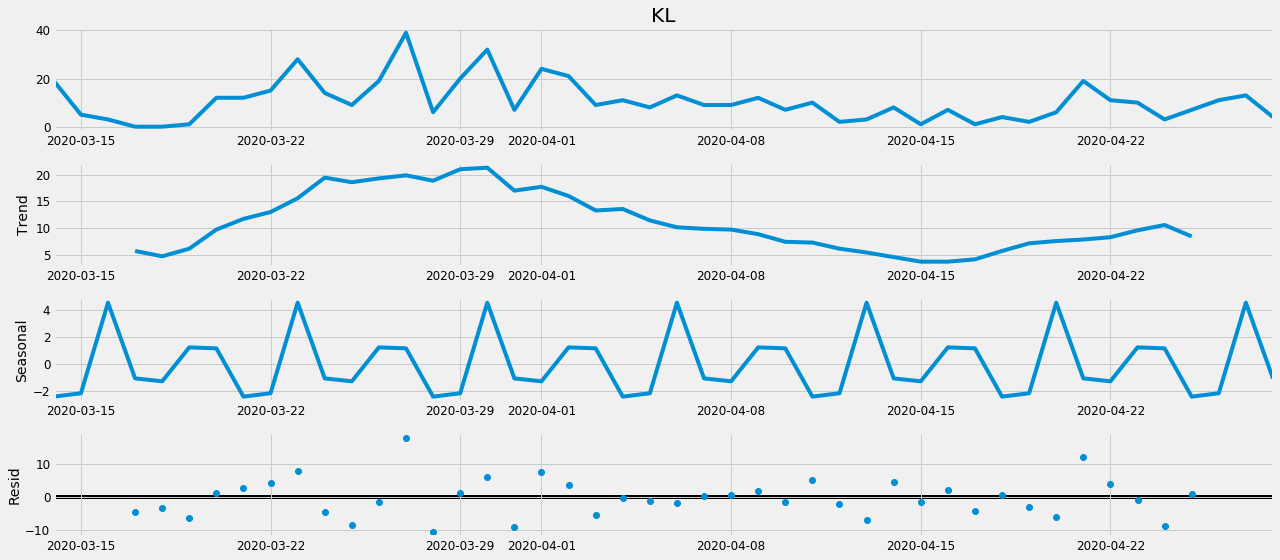

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:363.0361580856098
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1465.3355845443307
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:267.69387386459766


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:154.69067260110214
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:265.76982703648537


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1372.0459945652249
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:164.43438478814048
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:153.712722900938
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:336.500865668498


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1378.9314029418392
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:250.4730081172907
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:147.24565932172797
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:258.8564883976802


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1311.1573232546505
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:163.61643713601893
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:143.4444170912088
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:328.1435635088597
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1226.9482157898456


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:261.03628921427344
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:151.8146551830757
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:252.7296323839067


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1209.4821751838035
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:161.4521566356524
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:149.60789528085976
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:304.58970537953115


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1168.545060391866
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:239.26151643794088
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:130.38742649238992
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:234.75781828636963


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1161.1343193175182
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:151.39485550270845
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:124.90371336735053
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:331.01402250686886


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1028.3580094388158
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:264.00945650354106
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:152.83559213357177
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:248.05852140516168


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:819.2505986924065
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:155.42748912006618
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:150.5475244639114
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:312.5736078864958


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1369.8061271080333
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:246.23059945356232
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:140.93158417161607
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:230.33715263331203


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1317.7362624533866
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:150.5175147319356
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:141.2680121971427
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:320.7269652133363


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1409.2098841108768
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:253.2819114294178
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:148.46234141402576
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:230.0510838147784


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1401.5056658577973
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:149.03594503573322
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:143.96458390620109
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:306.0430315671024


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1286.5325001309695
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:240.95692954828934
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:131.37994461252083
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:221.0083366156345


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1278.0929487053654
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:144.2831772240441
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:126.27396690402014


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2243      0.404     -0.556      0.578      -1.015       0.567
ma.L1         -0.5490      0.388     -1.414      0.157      -1.310       0.212
ma.S.L12      -0.2595      0.199     -1.305      0.192      -0.649       0.130
sigma2        38.5880     11.645      3.314      0.001      15.764      61.412


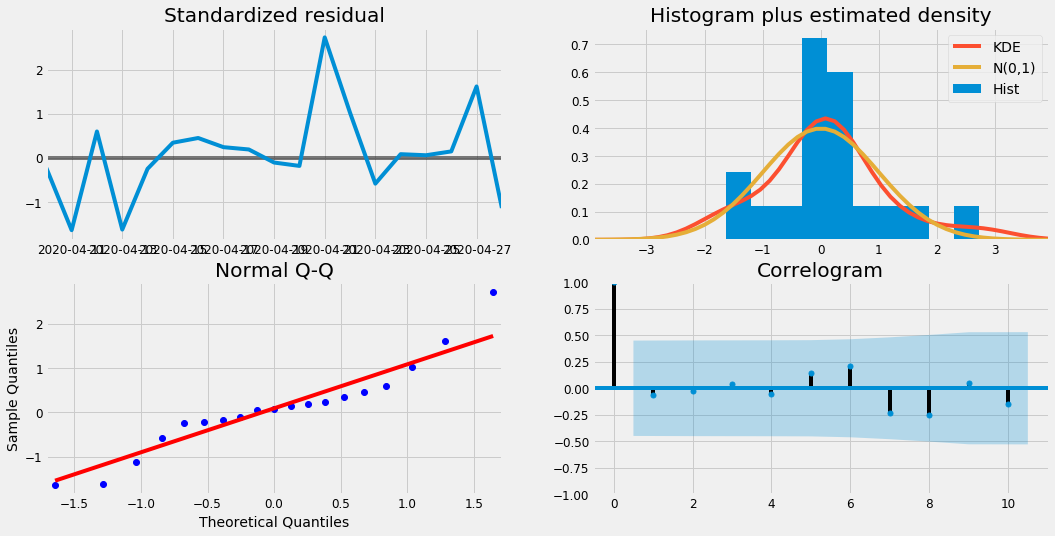

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

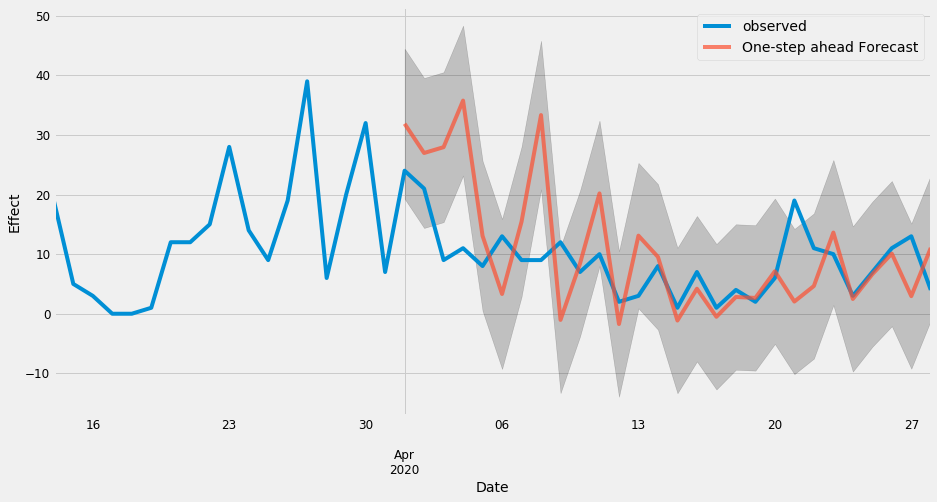

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 97.42


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 9.87


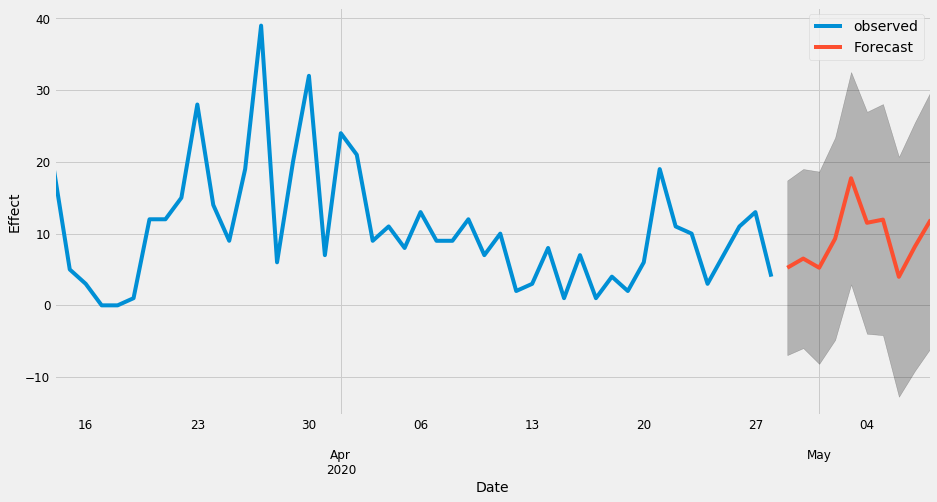

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,3,15
2020-04-25,7,7
2020-04-26,11,4
2020-04-27,13,13
2020-04-28,4,4


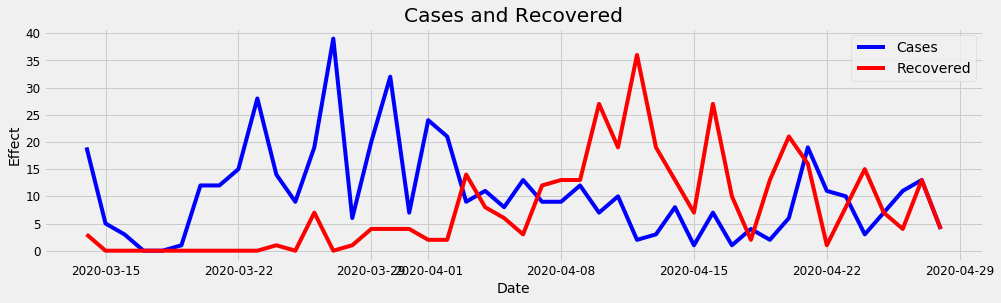

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

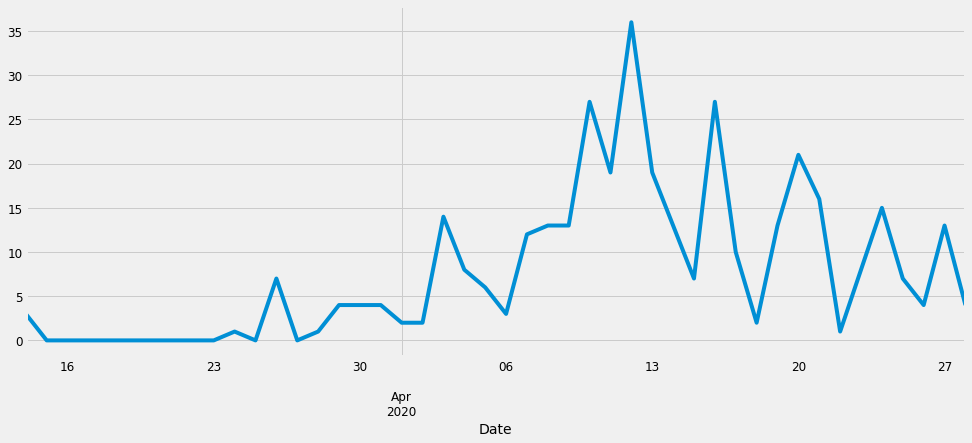

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

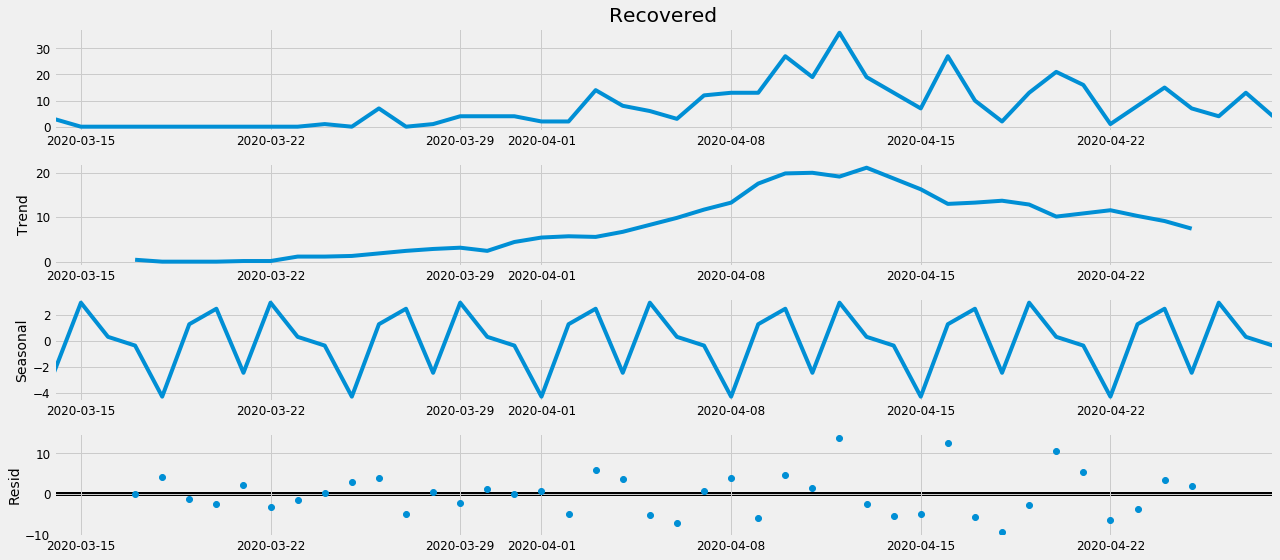

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:350.6118816887987


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1250.2352560315408
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:263.9089296492734
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:173.36060423172754
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:267.23360255185344


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:773.4891836611855
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:182.2210084405814
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:172.4937946989649
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:325.37388438827395
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1493.8024903737503


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:253.14227579725883
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:161.39951028994557
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:259.7121731499839


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1376.4872864798022
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:177.51585152547506
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:161.59569369454664
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:309.9199022649832
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1361.7546282138503


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:252.2120467214799
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:158.65133578066732
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:243.76131453078804


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1480.1694542490995
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:163.63371149415707
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:158.27602703283745
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:292.1060042384425


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1295.5346060569984
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:237.91096504616368
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:147.94200513934013
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:235.1753596939873


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1300.3285815536074
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:160.31029638874136
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:147.86791220697398
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:312.5251805327049


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1275.425638143418
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:254.1987457278487
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:163.66593617667152
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:241.68276808333565


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1153.6983579617106
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:162.71415032103613
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:163.76510966413312
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:299.7131864659897


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1095.5017662555845
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:245.46334741763178
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:155.0402803456393
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:237.49776885729062


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:974.3278703751926
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:160.73194271805977
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:154.21180482859296
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:305.61664457653


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1385.7425994307926
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:245.69546492633657
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:156.65747752001613
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:234.6460029311437


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1390.6542644483284
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:156.51243018669769
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:157.37312278387495
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:294.0727025426531


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1238.1625723706434
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:239.7840349553805
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:149.91925985536977
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:230.85665812670004


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1242.2140308116602
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:155.32531645786702
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:149.86186775690453


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0518      0.452     -0.114      0.909      -0.939       0.835
ma.L1         -0.5729      0.392     -1.461      0.144      -1.342       0.196
ma.S.L12      -1.0000   2.24e+04  -4.47e-05      1.000   -4.39e+04    4.39e+04
sigma2        71.8233   1.61e+06   4.47e-05      1.000   -3.15e+06    3.15e+06


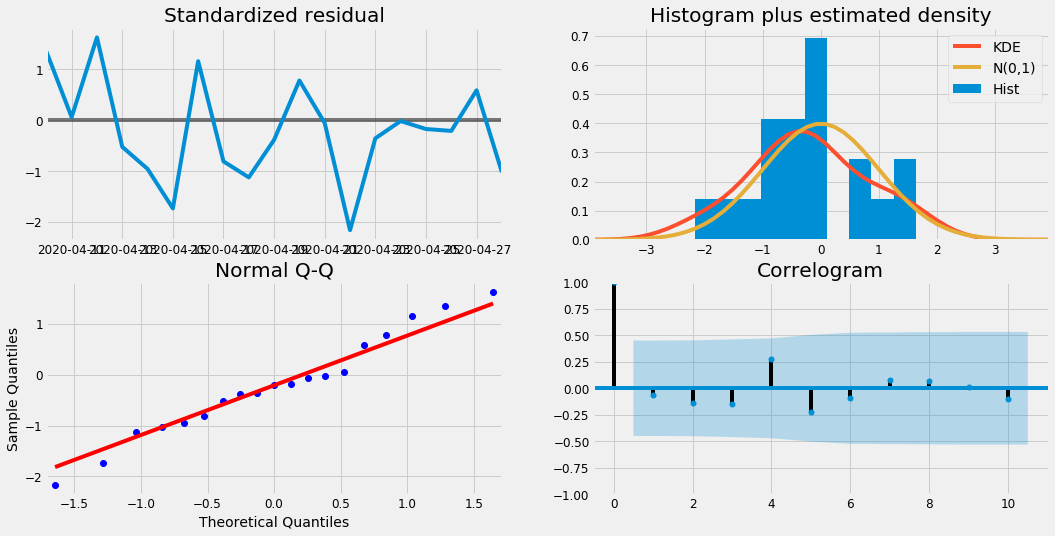

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

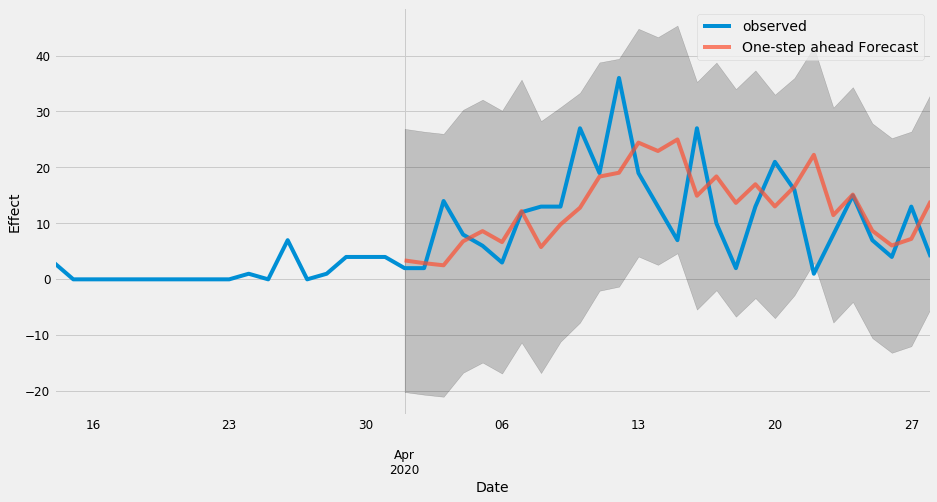

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 78.45


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 8.86


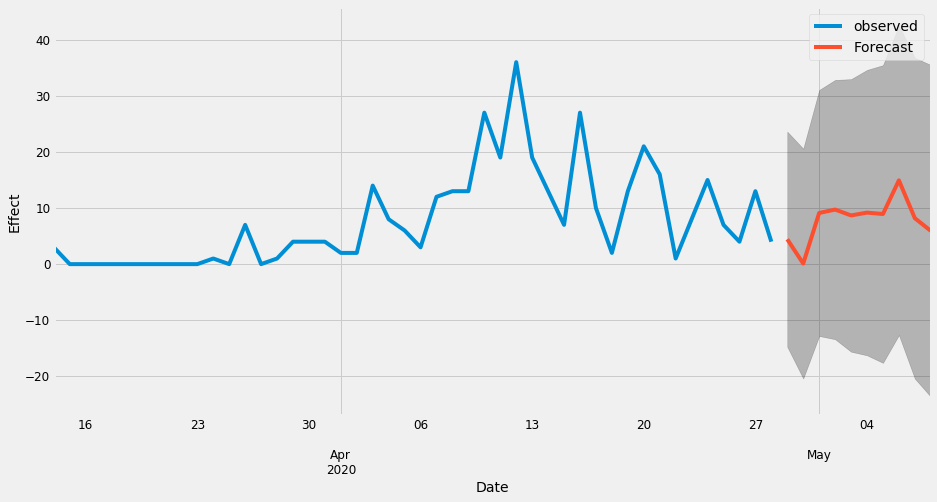

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

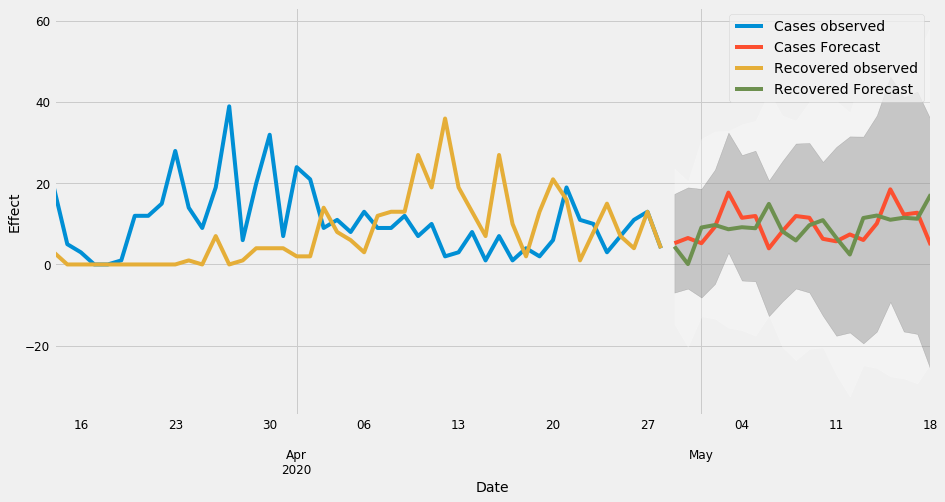

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=20)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=20)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

11

In [33]:
int(min(cases_result_date[0]))

3

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-06


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-06


In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-18
